<a href="https://colab.research.google.com/github/nsmsm/ASL/blob/master/1%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%AC%B8%EC%8A%B9%EB%AA%85_(201985010061)_09_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.3.0


In [2]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x/255.0
test_x = test_x/255.0

import numpy as np

## train, valid set split
np.random.seed(1234)
valid_ind = np.random.choice(np.arange(train_x.shape[0]), 10000, replace=False)
rest_ind = np.setdiff1d(np.arange(train_x.shape[0]), valid_ind)

n_train = 500

train_ind = np.random.choice(rest_ind, n_train, replace=False)

valid_x, valid_y = train_x[valid_ind], train_y[valid_ind]
train_x, train_y = train_x[train_ind], train_y[train_ind]

print(train_x.shape)
print(valid_x.shape)

11493376/11490434 [==============================] - 0s 0us/step
(500, 28, 28)
(10000, 28, 28)


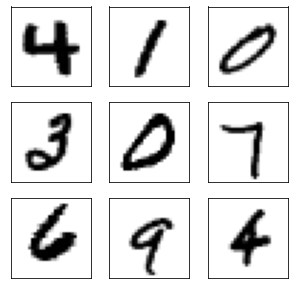

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for col1 in range(9):
  plt.subplot(3,3,col1+1)
  plt.imshow(train_x[col1], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
plt.show()

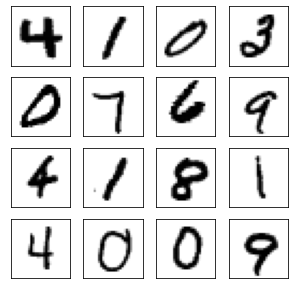

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for col1 in range(16):
  plt.subplot(4,4,col1+1)
  plt.imshow(train_x[col1], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

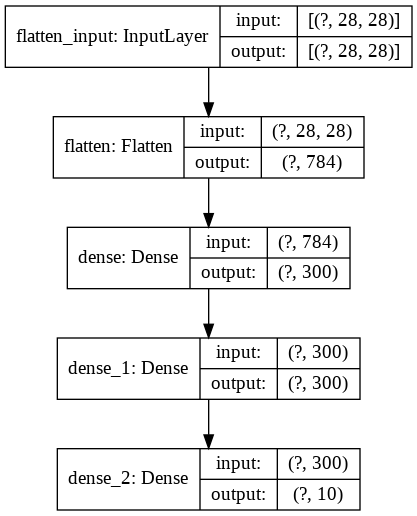

In [5]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)

model_dr = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dropout(0.7),
  Dense(300, activation='relu'),
  Dropout(0.7),
  Dense(10, activation='softmax')]
)
model.summary()
model_dr.summary()

plot_model(model, to_file='model_mnist.png', show_shapes=True)
plot_model(model, to_file='model_dr_mnist.png', show_shapes=True)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))
hist_dr=model_dr.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/100
5/5 [==============================] - 0s 59ms/step - loss: 2.0471 - accuracy: 0.3720 - val_loss: 1.6345 - val_accuracy: 0.6422
Epoch 2/100
5/5 [==============================] - 0s 32ms/step - loss: 1.3335 - accuracy: 0.7060 - val_loss: 1.0425 - val_accuracy: 0.7627
Epoch 3/100
5/5 [==============================] - 0s 32ms/step - loss: 0.8088 - accuracy: 0.8280 - val_loss: 0.6927 - val_accuracy: 0.8215
Epoch 4/100
5/5 [==============================] - 0s 34ms/step - loss: 0.5173 - accuracy: 0.8700 - val_loss: 0.5575 - val_accuracy: 0.8439
Epoch 5/100
5/5 [==============================] - 0s 32ms/step - loss: 0.3712 - accuracy: 0.9140 - val_loss: 0.4906 - val_accuracy: 0.8577
Epoch 6/100
5/5 [==============================] - 0s 33ms/step - loss: 0.2678 - accuracy: 0.9420 - val_loss: 0.4808 - val_accuracy: 0.8547
Epoch 7/100
5/5 [==============================] - 0s 35ms/step - loss: 0.1978 - accuracy: 0.9640 - val_loss: 0.4611 - val_accuracy: 0.8619
Epoch 8/100
5/5 [===

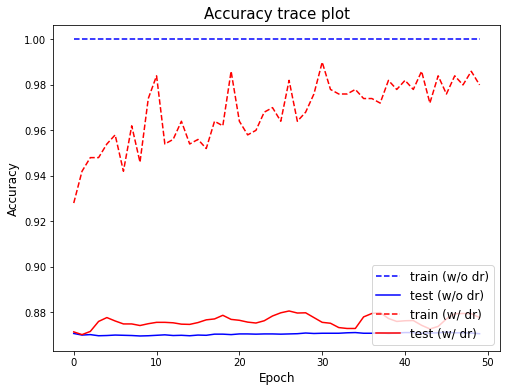

313/313 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.8866
Model stats (w/o dropout)
...accuracy: 0.880, loss: 0.563
Model stats (w/ dropout)
...accuracy: 0.887, loss: 0.463


In [7]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'][50:100], 'b--', label='train (w/o dr)')
plt.plot(hist.history['val_accuracy'][50:100], 'b-', label='test (w/o dr)')
plt.plot(hist_dr.history['accuracy'][50:100], 'r--', label='train (w/ dr)')
plt.plot(hist_dr.history['val_accuracy'][50:100], 'r-', label='test (w/ dr)')
#plt.ylim([0.96,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
sc_dr = model_dr.evaluate(test_x, test_y)
print('Model stats (w/o dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))
print('Model stats (w/ dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc_dr[1], sc_dr[0]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
__________________________

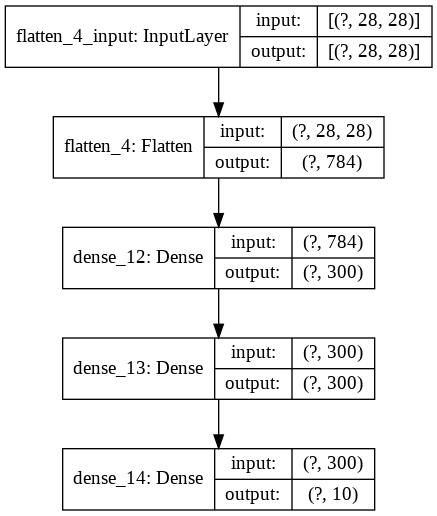

In [9]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)

model_dr = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)
model.summary()
model_dr.summary()

plot_model(model, to_file='model_mnist.png', show_shapes=True)
plot_model(model, to_file='model_dr_mnist.png', show_shapes=True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))
hist_dr=model_dr.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/100
5/5 [==============================] - 0s 79ms/step - loss: 2.0486 - accuracy: 0.3620 - val_loss: 1.6696 - val_accuracy: 0.5800
Epoch 2/100
5/5 [==============================] - 0s 34ms/step - loss: 1.3319 - accuracy: 0.6980 - val_loss: 1.0368 - val_accuracy: 0.7704
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 0.7918 - accuracy: 0.8140 - val_loss: 0.6861 - val_accuracy: 0.8150
Epoch 4/100
5/5 [==============================] - 0s 33ms/step - loss: 0.5211 - accuracy: 0.8780 - val_loss: 0.5432 - val_accuracy: 0.8513
Epoch 5/100
5/5 [==============================] - 0s 33ms/step - loss: 0.3540 - accuracy: 0.9100 - val_loss: 0.5036 - val_accuracy: 0.8433
Epoch 6/100
5/5 [==============================] - 0s 36ms/step - loss: 0.2695 - accuracy: 0.9320 - val_loss: 0.4610 - val_accuracy: 0.8597
Epoch 7/100
5/5 [==============================] - 0s 33ms/step - loss: 0.1958 - accuracy: 0.9480 - val_loss: 0.4428 - val_accuracy: 0.8703
Epoch 8/100
5/5 [===

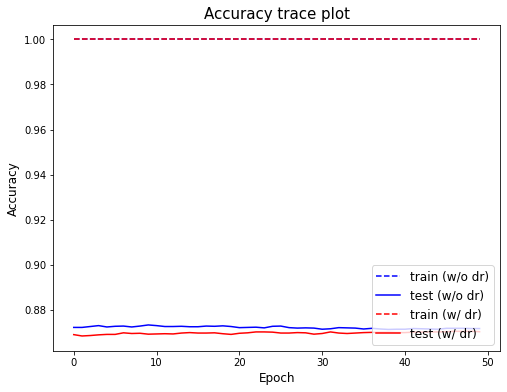

313/313 [==============================] - 1s 2ms/step - loss: 0.5520 - accuracy: 0.8817
Model stats (w/o dropout)
...accuracy: 0.883, loss: 0.549
Model stats (w/ dropout)
...accuracy: 0.882, loss: 0.552


In [11]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'][50:100], 'b--', label='train (w/o dr)')
plt.plot(hist.history['val_accuracy'][50:100], 'b-', label='test (w/o dr)')
plt.plot(hist_dr.history['accuracy'][50:100], 'r--', label='train (w/ dr)')
plt.plot(hist_dr.history['val_accuracy'][50:100], 'r-', label='test (w/ dr)')
#plt.ylim([0.96,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
sc_dr = model_dr.evaluate(test_x, test_y)
print('Model stats (w/o dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))
print('Model stats (w/ dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc_dr[1], sc_dr[0]))